In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [6]:
df.Gender=label.fit_transform(df['Gender'])
df.Gender

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

In [7]:
df.Gender.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [8]:
df.Gender.tail()

8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, dtype: int32

# SEperating X < Y

In [9]:
x=df.drop('Weight',axis=1)
x

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [10]:
x.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


In [11]:
x.tail()

,Gender,Height
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971
8554,0,60.921791


# Alternative way 

In [12]:
x=df[['Gender','Height']]
x

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796
...,...,...
8550,0,60.483946
8551,0,63.423372
8552,0,65.584057
8553,0,67.429971


In [13]:
y=df.Weight
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

In [14]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

# validate Training and Testing Data

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=100)
xtrain

,Gender,Height
4598,1,65.757332
2629,1,70.098577
4041,1,66.626519
6446,0,63.433608
1234,1,68.034731
...,...,...
350,1,66.166363
79,1,66.029034
8039,0,62.719589
6936,0,58.126024


In [16]:
xtrain.head()



,Gender,Height
4598,1,65.757332
2629,1,70.098577
4041,1,66.626519
6446,0,63.433608
1234,1,68.034731


In [17]:
ytrain.head()

4598    167.667432
2629    176.671150
4041    179.053683
6446    145.973898
1234    170.648409
Name: Weight, dtype: float64

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

# Training Linear regression model with train data

In [19]:
reg.fit(xtrain,ytrain)

LinearRegression()

# Prediction

In [20]:
reg.predict(xtest)

array([189.05757775, 195.00707569, 117.21643688, ..., 199.27938671,
       189.37372212, 199.14068335])

In [21]:
xtest

,Gender,Height
3003,1,69.357976
2863,1,70.359691
6402,0,60.623781
386,1,75.620193
3895,1,63.977705
...,...,...
5509,0,64.653941
6684,0,66.282938
85,1,71.079018
3405,1,69.411205


In [22]:
ytest

3003    200.941916
2863    196.138027
6402    120.382573
386     226.207780
3895    142.343712
           ...    
5509    135.073886
6684    132.755788
85      188.602919
3405    178.591842
408     203.139433
Name: Weight, Length: 2567, dtype: float64

In [23]:
pred_y=reg.predict(xtest)
pred_y


array([189.05757775, 195.00707569, 117.21643688, ..., 199.27938671,
       189.37372212, 199.14068335])

# Accuracy of MSE

In [24]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred_y)
mse

102.6575109853868

# Accuracy of MAE

In [25]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(ytest,pred_y)
mae

7.97849451731193

# Applying KNN Regressor

In [27]:
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(xtrain,ytrain)

KNeighborsRegressor()

In [28]:
predicted_y=regressor.predict(xtest)
predicted_y

array([188.29113492, 195.64029964, 119.21987933, ..., 190.12945432,
       184.8964466 , 197.70114882])

In [29]:
regressor.predict(x)

array([225.15463286, 179.5330844 , 218.50028778, ..., 153.94944968,
       161.58744248, 118.24222614])

# mean_squared_error

In [30]:
from sklearn.metrics import mean_squared_error
mse2=mean_squared_error(ytest,predicted_y)

In [31]:
mse2

122.60322635411539

# KNN Classifier

In [32]:
import pandas as pd
import numpy as np
df1=pd.read_csv('weight-height.csv')
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [33]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df1.Gender=label.fit_transform(df1['Gender'])
df1

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405


In [34]:
df1.Gender.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

# Seperating x1,y1

In [35]:
x1=df1.drop('Gender',axis=1)
x1

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [36]:
y1=df1.Gender
y1

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int32

# Validate Training Data and Testing Data

In [38]:
from sklearn.model_selection import train_test_split
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=.30)
x1train

,Height,Weight
6972,62.675208,109.147606
2184,68.074620,176.977426
1806,70.825603,173.963577
1107,70.555004,192.260745
1564,72.200887,195.275538
...,...,...
4067,73.298339,194.948577
1708,68.227615,174.712432
4383,67.360223,174.586148
6886,60.129660,122.924091


In [39]:

len(x1train)

5988

In [40]:
y1train

6972    0
2184    1
1806    1
1107    1
1564    1
       ..
4067    1
1708    1
4383    1
6886    0
7637    0
Name: Gender, Length: 5988, dtype: int32

In [41]:
len(y1train)

5988

# KNN Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x1train,y1train)

KNeighborsClassifier()

# Evaluated Model

In [43]:
predic_y=knn.predict(x1test)
predic_y

array([1, 1, 0, ..., 0, 0, 0])

In [44]:
np.array(y1test)

array([1, 1, 0, ..., 0, 0, 0])

# Calculate Accuracy

In [45]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_roc_curve
classification_report(y1test,predic_y)

'              precision    recall  f1-score   support\n\n           0       0.89      0.90      0.89      1095\n           1       0.92      0.92      0.92      1472\n\n    accuracy                           0.91      2567\n   macro avg       0.91      0.91      0.91      2567\nweighted avg       0.91      0.91      0.91      2567\n'

In [46]:
print(classification_report(y1test,predic_y))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1095
           1       0.92      0.92      0.92      1472

    accuracy                           0.91      2567
   macro avg       0.91      0.91      0.91      2567
weighted avg       0.91      0.91      0.91      2567



# Confusion Matrix

In [47]:
cm=confusion_matrix(y1test,predic_y)
cm

array([[ 984,  111],
       [ 123, 1349]], dtype=int64)

Text(33.0, 0.5, 'Actual Value')

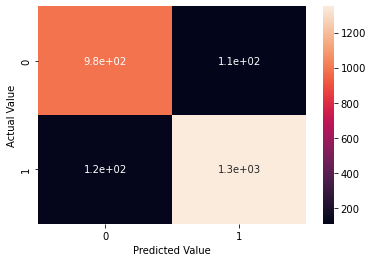

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [50]:
tp,fn,fp,tn=confusion_matrix(y1test,predic_y).reshape(-1)

In [51]:
tp

984

In [52]:
fp

123

In [53]:
fn

111

In [54]:
tn

1349

In [55]:
(tp+tn)/(tp+fn+fp+tn)

0.9088430074016361

In [56]:
knn.score(x1test,y1test)

0.9088430074016361

# ROC curve

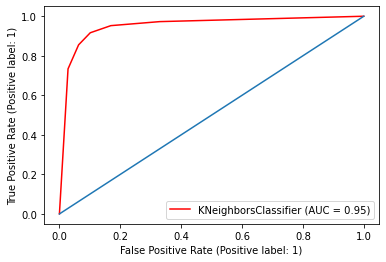

In [57]:
plot_roc_curve(knn,x1test,y1test,color='red')
plt.plot([0,1],[0,1])

# Measurement All type of pereformance with confusion matrix

In [58]:
accuracy=(tp+tn)/(tp+fp+fn+tn)
accuracy

0.9088430074016361

In [59]:
ppv=tp/(tp+fp)
ppv

0.8888888888888888

In [60]:
tpr=tp/(tp+fn)
tpr


0.8986301369863013

In [61]:
fpr=fp/(fp+tn)
fpr

0.08355978260869565

In [62]:
f1_measure=(ppv+tpr)/2
f1_measure

0.893759512937595

In [63]:
csi=tp/(tp+fn+fp)
csi

0.8078817733990148

In [64]:
f1_score=(2*ppv+tpr)/(ppv+tpr)
f1_score

1.497275204359673